#Tarea 1
#Ricardo Zamora Mennigke
#Visualizacion de Datos

1. [10 puntos] Con base en su experiencia indique posibles aplicaciones de la visualizaci´on de
datos en su entono profesional as´ı como que tipo de visualizaciones espera poder desarrollar al
finalizar el curso.

A diario uso visualizacion de datos en mi trabajo, usualmente debe aplicarlo de manera mas formal mediante el software de Power Bi, aunque en ocasiones empleo tambien softwares estadisticos como R y Python. El fin principal de usar visualizaciones es la generacion de dashboards y reportes para presentar y analizar informacion para la toma de decisiones con distintos profesionales en mi trabajo. Dado que visualización de datos es la representación gráfica de información y datos resulta fundamental para coordinar proyectos de mejora operacional en mi labor. Al final del curso espero poder realizar visualizaciones mas complejos con el programa de Python, ya que el tipo de visualizacion que se logra generalmente es muy simple y bastante descriptivo con poca ganacia inferencial de analisis mas complejos.

2. [20 puntos] Utilizando los datos de la tabla cafe.csv realice lo siguiente:

a) Lea el archivo y verifique que este se ley´o correctamente usando la funci´on dtypes del
objeto pandas.

In [1]:
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
%matplotlib inline
plt.ioff()
import numpy as np
import pandas as pd

pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 1")
print(os.getcwd())
datos = pd.read_csv('cafe.csv',delimiter=',',decimal=".")
print(datos.shape)
print(datos.head())
print(datos.info())
datos.dtypes

C:\Users\rzamoram\OneDrive - Intel Corporation\Documents\Machine Learning\Visualizacion de Datos en Python\Semana 1
(617, 10)
   Unnamed: 0 country_of_origin  aroma  flavor  aftertaste  acidity  body  \
0           1          Ethiopia   8.67    8.83        8.67     8.75  8.50   
1           2          Ethiopia   8.75    8.67        8.50     8.58  8.42   
2           3         Guatemala   8.42    8.50        8.42     8.42  8.33   
3           4          Ethiopia   8.17    8.58        8.42     8.42  8.50   
4           5          Ethiopia   8.25    8.50        8.25     8.50  8.42   

   balance  uniformity  total_cup_points  
0     8.42        10.0             90.58  
1     8.42        10.0             89.92  
2     8.42        10.0             89.75  
3     8.25        10.0             89.00  
4     8.33        10.0             88.83  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  


Unnamed: 0             int64
country_of_origin     object
aroma                float64
flavor               float64
aftertaste           float64
acidity              float64
body                 float64
balance              float64
uniformity           float64
total_cup_points     float64
dtype: object

b) Dise˜ne el prototipo de un gr´afico que permita compara el comportamiento de la variable
total cup points entre los distintos paises, este puede ser en papel o con ayuda de alg´un
editor, por ejemplo, paint.

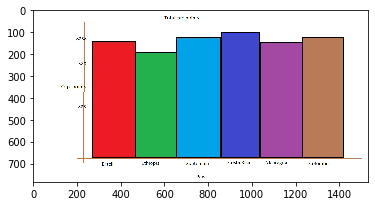

In [4]:
from PIL import Image
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 1")
os.getcwd()
image = Image.open("Tarea 1_Ejercicio 2_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

c) Replique el gr´afico dise˜nado en el punto anterior utilizando la libreria matplotlib.

Aqui resulta importante notar que existe la posibilidad de analizar el puntaje en terminos de suma o por promedio. Dado que es un dato en duda se procede a graficar ambos casos.

Caso suma de puntajes

In [8]:
class MyPlot(plt.Axes):
    def __init__(self, *args, **kwargs):
      super().__init__(*args, **kwargs)

    def labs(self, title = "", x = "", y = "", title_pad = 10, title_size = 12):
      self.set_title(title, pad = title_pad, fontdict = {'fontsize':title_size})
      self.set_xlabel(x)
      self.set_ylabel(y)
    
    def theme_minimal(self):
      self.spines['top'].set_visible(False)
      self.spines['right'].set_visible(False)
      self.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    def add_points(self, data, x, y, color = None):
      if color is None:
        self.plot(data[x], data[y], 'o', ms = 3)
      else:
        for g in data[color].unique():
          d = data[data[color] == g]
          self.plot(d[x], d[y], 'o', ms = 3, label = g)
          legend = self.legend(handletextpad=0.05)
          lhs = legend.legendHandles
          for lh in lhs:
            lh._legmarker.set_markersize(4)

    def add_bars(self, data, x, y, label = False, fun = "sum", color = "#78c4d4"):
      d = data.groupby(x).agg(fun)
      bars = self.bar(d.index, d[y], color = color, alpha = 1)
      if label :
        for bar in bars:
          height = round(bar.get_height(),2)
          self.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')




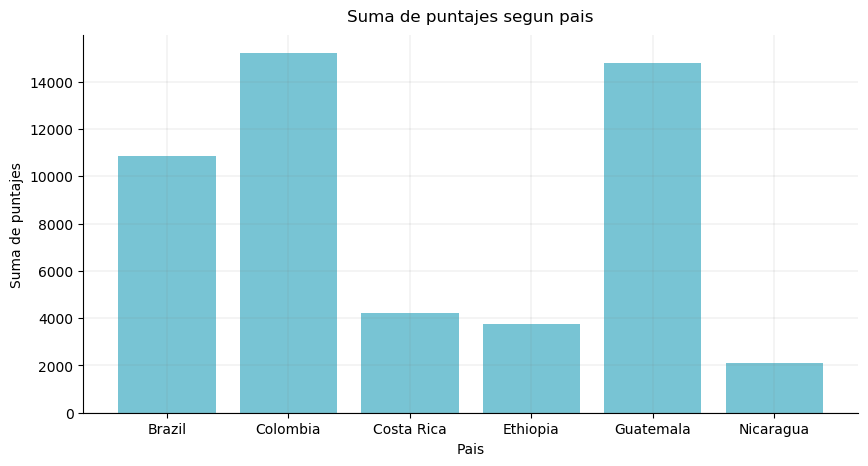

In [12]:
fig, axes = plt.subplots(figsize=(10, 5), dpi = 100)
axes.__class__ = MyPlot

axes.labs(title = "Suma de puntajes segun pais", 
          x = "Pais",
          y = "Suma de puntajes")
axes.theme_minimal()
axes.add_bars(data = datos, x = "country_of_origin", y = "total_cup_points")



Caso promedio de puntajes

In [14]:
class MyPlot(plt.Axes):
    def __init__(self, *args, **kwargs):
      super().__init__(*args, **kwargs)

    def labs(self, title = "", x = "", y = "", title_pad = 10, title_size = 12):
      self.set_title(title, pad = title_pad, fontdict = {'fontsize':title_size})
      self.set_xlabel(x)
      self.set_ylabel(y)
    
    def theme_minimal(self):
      self.spines['top'].set_visible(False)
      self.spines['right'].set_visible(False)
      self.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    def add_points(self, data, x, y, color = None):
      if color is None:
        self.plot(data[x], data[y], 'o', ms = 3)
      else:
        for g in data[color].unique():
          d = data[data[color] == g]
          self.plot(d[x], d[y], 'o', ms = 3, label = g)
          legend = self.legend(handletextpad=0.05)
          lhs = legend.legendHandles
          for lh in lhs:
            lh._legmarker.set_markersize(4)

    def add_bars(self, data, x, y, label = False, fun = "mean", color = "#78c4d4"):
      d = data.groupby(x).agg(fun)
      bars = self.bar(d.index, d[y], color = color, alpha = 1)
      if label :
        for bar in bars:
          height = round(bar.get_height(),2)
          self.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

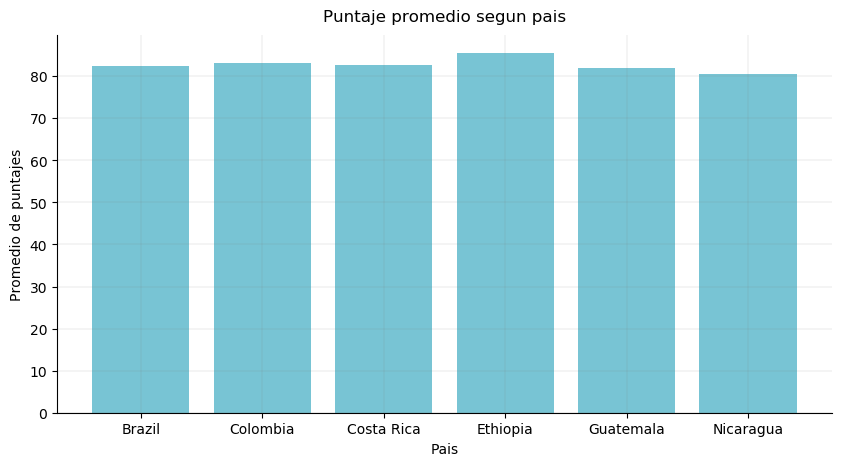

In [17]:
fig, axes = plt.subplots(figsize=(10, 5), dpi = 100)
axes.__class__ = MyPlot

axes.labs(title = "Puntaje promedio segun pais", 
          x = "Pais",
          y = "Promedio de puntajes")
axes.theme_minimal()
axes.add_bars(data = datos, x = "country_of_origin", y = "total_cup_points")


d) Repita el punto anterior esta vez utilizando la libreria seanborn

Caso promedio de puntajes

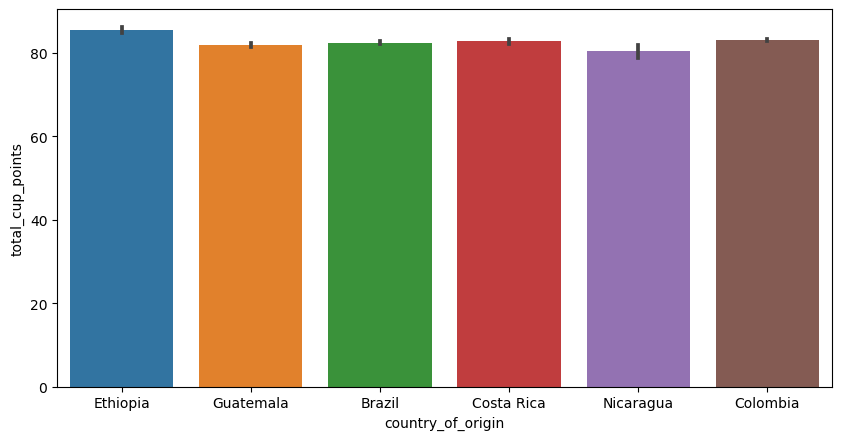

In [21]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)
def theme_minimal(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

sb.barplot(x="country_of_origin", y="total_cup_points", data=datos, ax = ax)


Caso suma de puntajes

In [26]:
class MyPlot(plt.Axes):
    def __init__(self, *args, **kwargs):
      super().__init__(*args, **kwargs)

    def labs(self, title = "", x = "", y = "", title_pad = 10, title_size = 12):
      self.set_title(title, pad = title_pad, fontdict = {'fontsize':title_size})
      self.set_xlabel(x)
      self.set_ylabel(y)
    
    def theme_minimal(self):
      self.spines['top'].set_visible(False)
      self.spines['right'].set_visible(False)
      self.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    def add_points(self, data, x, y, color = None):
      if color is None:
        self.plot(data[x], data[y], 'o', ms = 3)
      else:
        for g in data[color].unique():
          d = data[data[color] == g]
          self.plot(d[x], d[y], 'o', ms = 3, label = g)
          legend = self.legend(handletextpad=0.05)
          lhs = legend.legendHandles
          for lh in lhs:
            lh._legmarker.set_markersize(4)

    def add_bars(self, data, x, y, label = False, fun = "sum", color = "#78c4d4"):
      d = data.groupby(x).agg(fun)
      bars = self.bar(d.index, d[y], color = color, alpha = 1)
      if label :
        for bar in bars:
          height = round(bar.get_height(),2)
          self.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')


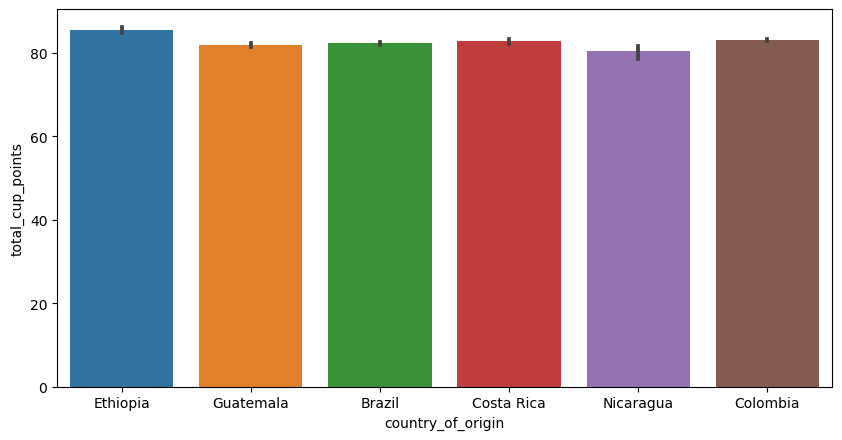

In [27]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)
def theme_minimal(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

sb.barplot(x="country_of_origin", y="total_cup_points", data=datos, ax = ax)

3. [20 puntos] Usando como referencia el gr´afico mostrado a continuaci´on identifique los componentes del gr´afico y que informaci´on est´a codificada en cada uno de los elementos est´eticos del gr´afico, esto puede ser utilizando l´apiz y papel o con ayuda de alg´un editor, por ejemplo, paint.

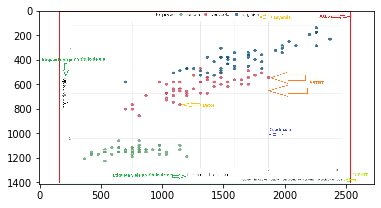

In [28]:
from PIL import Image
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 1")
os.getcwd()
image = Image.open("Tarea 1_Ejercicio 3_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

4. [20 puntos] Utilizando la libreria libreria seanborn y los datos de la tabla peliculas.csv realice lo siguiente:
fecha lanzamiento: a˜no de la observaci´on
genero: G´enero cinematogr´afico
n: Cantidad de peliculas de ese g´enero publicadas ese a˜no
p: Porcentaje que representan las pel´ıculas de un g´enero en el total de pel´ıculas publicadas ese mismo a˜no.

a) Dise˜ne un gr´afico que permite visualizar la cantidad de pel´ıculas estrenadas en cada a˜no.

In [29]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 1")
print(os.getcwd())
datos = pd.read_csv('peliculas.csv',delimiter=',',decimal=".")
print(datos.shape)
print(datos.head())
print(datos.info())
datos.dtypes

C:\Users\rzamoram\OneDrive - Intel Corporation\Documents\Machine Learning\Visualizacion de Datos en Python\Semana 1
(231, 5)
   Unnamed: 0 fecha_lanzamiento   genero    n         p
0           1        1952-01-01   Action   47  0.088346
1           2        1952-01-01   Comedy   98  0.184211
2           3        1952-01-01    Drama  206  0.387218
3           4        1952-01-01   Horror   11  0.020677
4           5        1952-01-01  Romance   83  0.156015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         231 non-null    int64  
 1   fecha_lanzamiento  231 non-null    object 
 2   genero             231 non-null    object 
 3   n                  231 non-null    int64  
 4   p                  231 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.1+ KB
None


Unnamed: 0             int64
fecha_lanzamiento     object
genero                object
n                      int64
p                    float64
dtype: object

In [31]:
datos['fecha_lanzamiento'] = pd.to_datetime(datos['fecha_lanzamiento'])
datos['year'], datos['month'] = datos['fecha_lanzamiento'].dt.year, datos['fecha_lanzamiento'].dt.month
datos.head()

,Unnamed: 0,fecha_lanzamiento,genero,n,p,year,month
0,1,1952-01-01,Action,47,0.088346,1952,1
1,2,1952-01-01,Comedy,98,0.184211,1952,1
2,3,1952-01-01,Drama,206,0.387218,1952,1
3,4,1952-01-01,Horror,11,0.020677,1952,1
4,5,1952-01-01,Romance,83,0.156015,1952,1


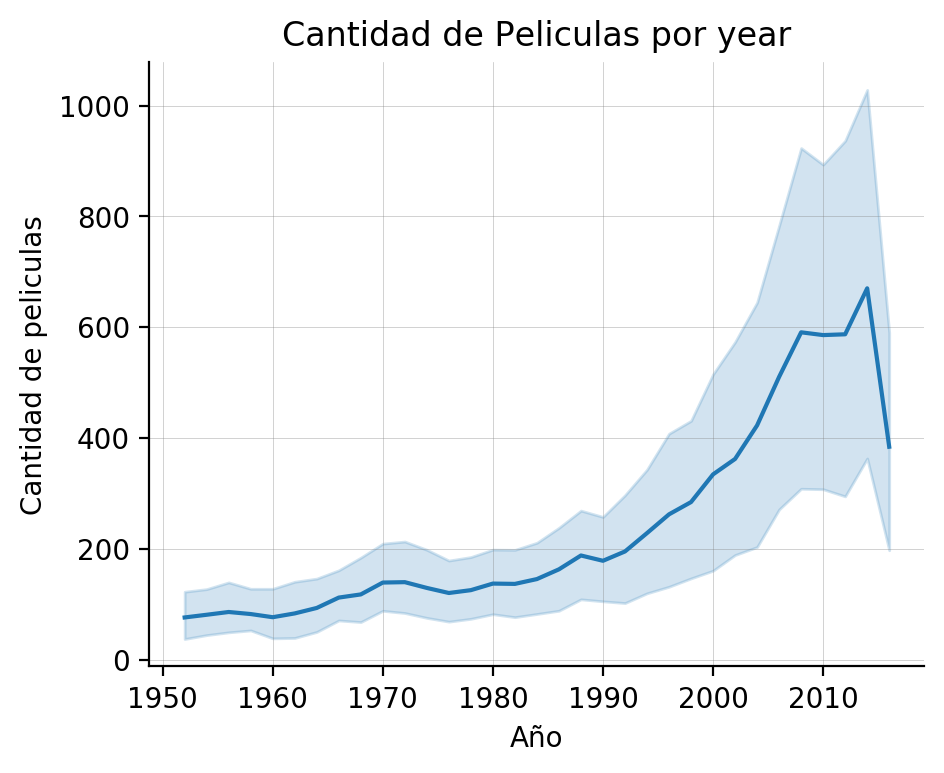

In [34]:
fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
def theme_minimal(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

sb.lineplot(x = "year", y = "n", data = datos)
ax.set_title("Cantidad de Peliculas por year")
ax.set_ylabel("Cantidad de peliculas")
ax.set_xlabel("Año")
theme_minimal(ax)



b) Dise˜ne un gr´afico que permita comparar en forma relativa la cantidad de pel´ıculas que se estrenaron al a˜no por g´enero.

In [35]:
#san_jose = delitos[delitos.Provincia == "San Jose"]
san_jose = datos.set_index('fecha_lanzamiento')
delitos_mes_canton = san_jose.groupby([pd.Grouper(freq='M'),"genero"]).sum()["n"]
delitos_mes_canton.head(20)

cantones = delitos_mes_canton.index.get_level_values(1).unique()
print(cantones)

Index(['Action', 'Comedy', 'Drama', 'Horror', 'Romance', 'Thriller',
       'Western'],
      dtype='object', name='genero')


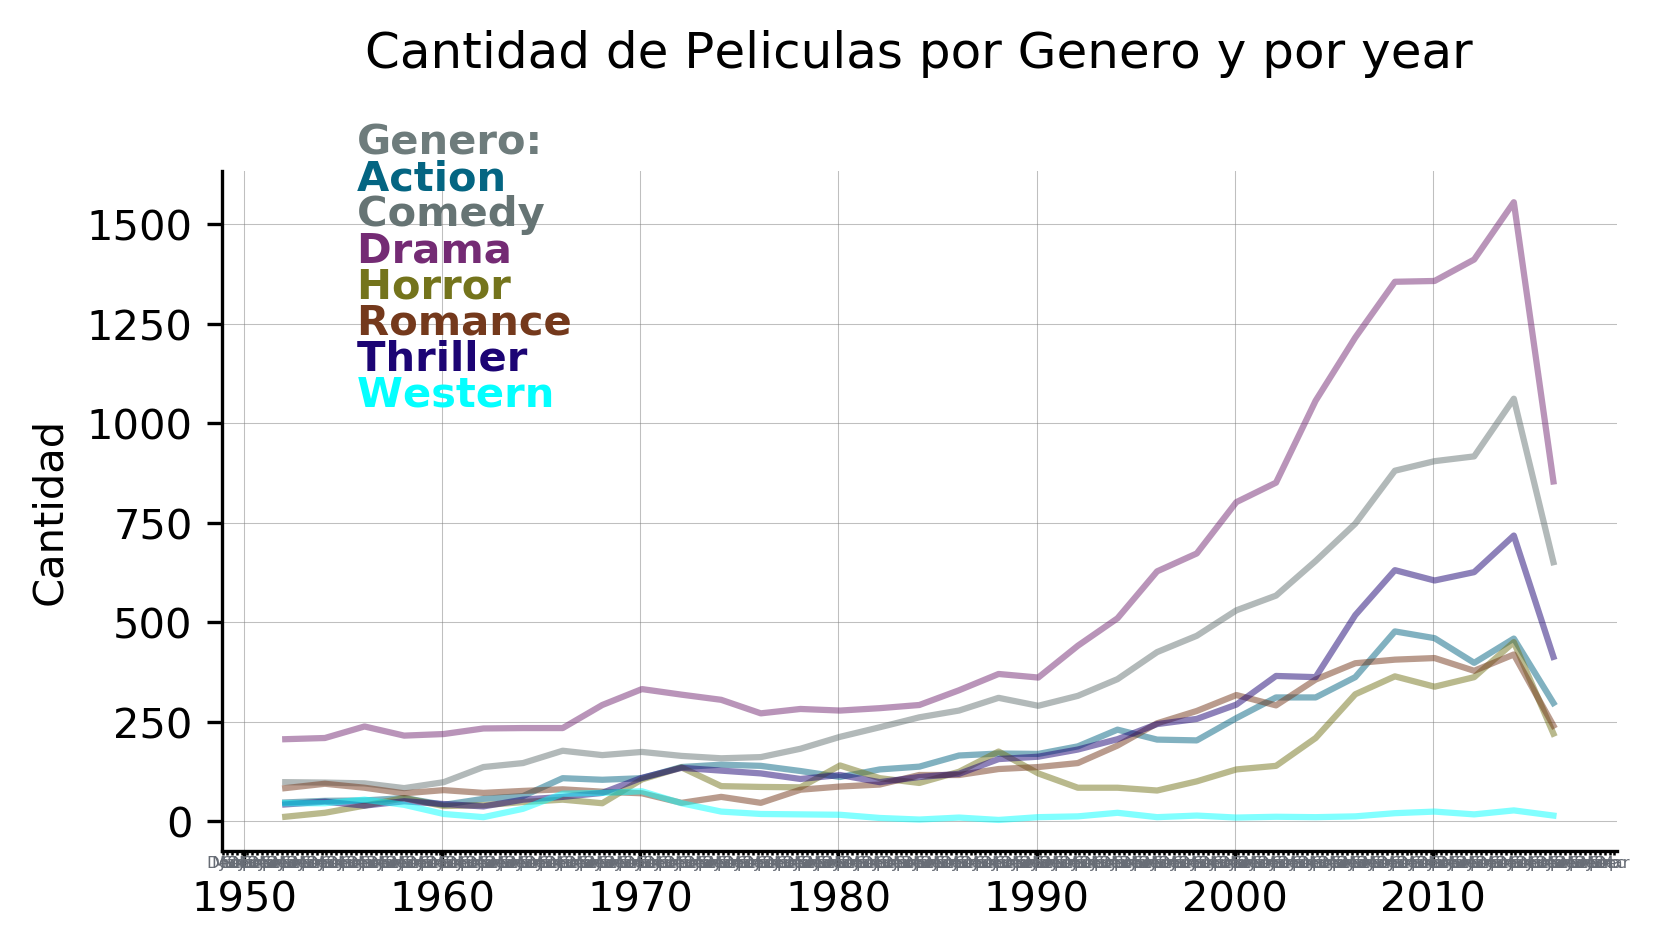

In [37]:
import matplotlib.dates as mdates

# Lienzo
fig, ax = plt.subplots(figsize=(6, 3), dpi = 300)
ax.__class__ = MyPlot

ax.labs(title = "Cantidad de Peliculas por Genero y por year", 
        title_pad = 25,
        y = "Cantidad")
ax.theme_minimal()


# Dibujar las lineas
for genero in cantones:
  df = delitos_mes_canton[delitos_mes_canton.index.get_level_values(1) == genero]
  x = df.index.get_level_values(0)
  y = df
  if genero == "Action":
    color = "#046582"
    alpha = 0.5
  elif genero == "Comedy":
    color = "#667474"
    alpha = 0.5
  elif genero == "Drama":
    color = "#742b74"
    alpha = 0.5
  elif genero == "Horror":
    color = "#74741c"
    alpha = 0.5
  elif genero == "Romance":
    color = "#74391c"
    alpha = 0.5
  elif genero == "Thriller":
    color = "#1c0474"
    alpha = 0.5
  elif genero == "Western":
    color = "#04ffff"
    alpha = 0.5
  else:
    color = "#6e7c7c"
    alpha = 0.5
  plt.plot(x,y, color = color, alpha = alpha)



ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # formato de los cortes principales
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b")) # formato de los cortes secundarios
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) # intervalo de los cortes secundarios
ax.tick_params(axis='x', which='minor', labelsize=4, length = 1, pad = 0, labelcolor = "#686d76") # formato texto cortes secundarios

# Anotacinones
fig.text(0.2,0.9,"Genero:", color = "#6e7c7c", weight="bold")
fig.text(0.2,0.86,"Action  ", color = "#046582", weight="bold")
fig.text(0.2,0.82,"Comedy ", color = "#667474", weight="bold")
fig.text(0.2,0.78,"Drama  ", color = "#742b74", weight="bold")
fig.text(0.2,0.74,"Horror ", color = "#74741c", weight="bold")
fig.text(0.2,0.7,"Romance ", color = "#74391c", weight="bold")
fig.text(0.2,0.66,"Thriller  ", color = "#1c0474", weight="bold")
fig.text(0.2,0.62,"Western ", color = "#04ffff", weight="bold")        
         
import seaborn as sb


def theme_minimal(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


theme_minimal(ax)


c) Dise˜ne una paleta de color para el gr´afico y justifique la selecci´on de colores.

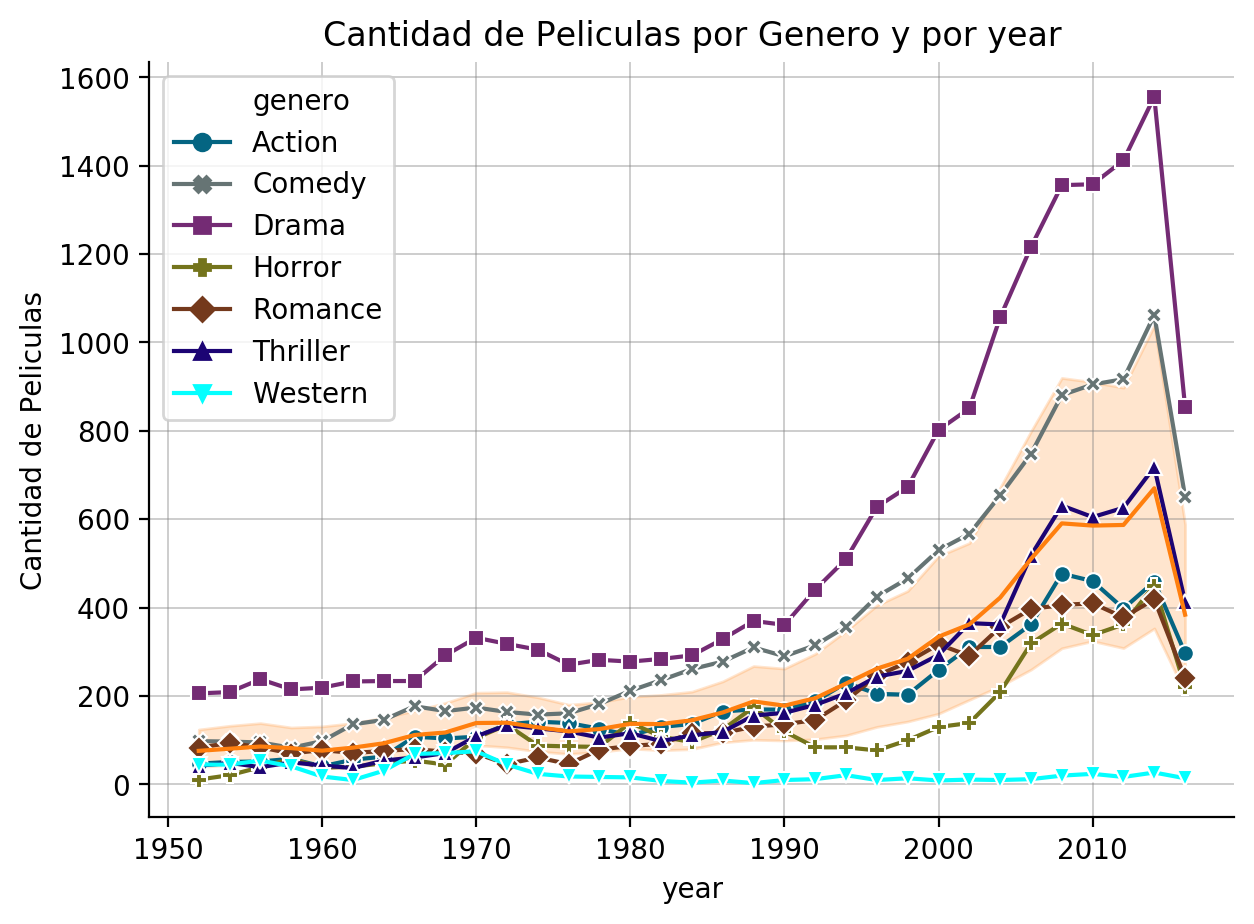

In [39]:
fig, ax = plt.subplots(figsize=(7, 5), dpi = 200)

def theme_minimal(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.55, alpha=0.5)
  ax.set_title('Cantidad de Peliculas por Genero y por year')
  ax.set_xlabel('year')
  ax.set_ylabel('Cantidad de Peliculas')
 

paleta = {
  "Action": "#046582",
  "Comedy": "#667474",
  "Horror": "#74741c",
  "Drama": "#742b74",
  "Romance": "#74391c",
  "Thriller": "#1c0474",
  "Western": "#04ffff"}

for genero in cantones:
  df = delitos_mes_canton[delitos_mes_canton.index.get_level_values(1) == genero]
  x = df.index.get_level_values(0)
  y = df

sb.lineplot(x = "year", y = "n",data = datos,ax=ax,hue="genero",
             style="genero", markers=True, dashes=False,palette=paleta)
sb.lineplot(x = "year", y = "n",data = datos,ax=ax)
theme_minimal(ax)


5. [20 puntos] Utilizando la tabla temperaturasUSA.csv realice los siguiente:


a) Lea los datos y verifique que se ley´o de forma correcta.

In [40]:
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 1")
print(os.getcwd())
datos = pd.read_csv('temperaturasUSA.csv',delimiter=',',decimal=".")
print(datos.shape)
print(datos.head())
print(datos.info())
datos.dtypes

C:\Users\rzamoram\OneDrive - Intel Corporation\Documents\Machine Learning\Visualizacion de Datos en Python\Semana 1
(48, 4)
   Unnamed: 0      location month       mean
0           1  Death Valley   Jan  53.451613
1           2  Death Valley   Feb  59.944828
2           3  Death Valley   Mar  68.448387
3           4  Death Valley   Apr  76.293333
4           5  Death Valley   May  86.606452
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48 non-null     int64  
 1   location    48 non-null     object 
 2   month       48 non-null     object 
 3   mean        48 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB
None


Unnamed: 0      int64
location       object
month          object
mean          float64
dtype: object

b) Dise˜ne utilizando l´apiz y papel un gr´afico que permita comparar el comportamiento de la temperatura de las diferentes localidades a lo lago del a˜no.

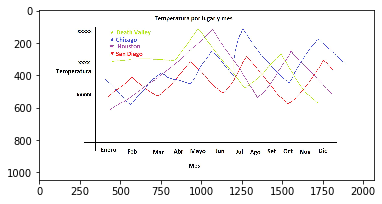

In [41]:
from PIL import Image
pasada = os.getcwd()
os.chdir("C:/Users/rzamoram/OneDrive - Intel Corporation/Documents/Machine Learning/Visualizacion de Datos en Python/Semana 1")
os.getcwd()
image = Image.open("Tarea 1_Ejercicio 5_Ricardo Zamora Mennigke.jpg")
plt.imshow(image)

c) Replique el gr´afico del punto anterior utilizando el paquete seanborn.

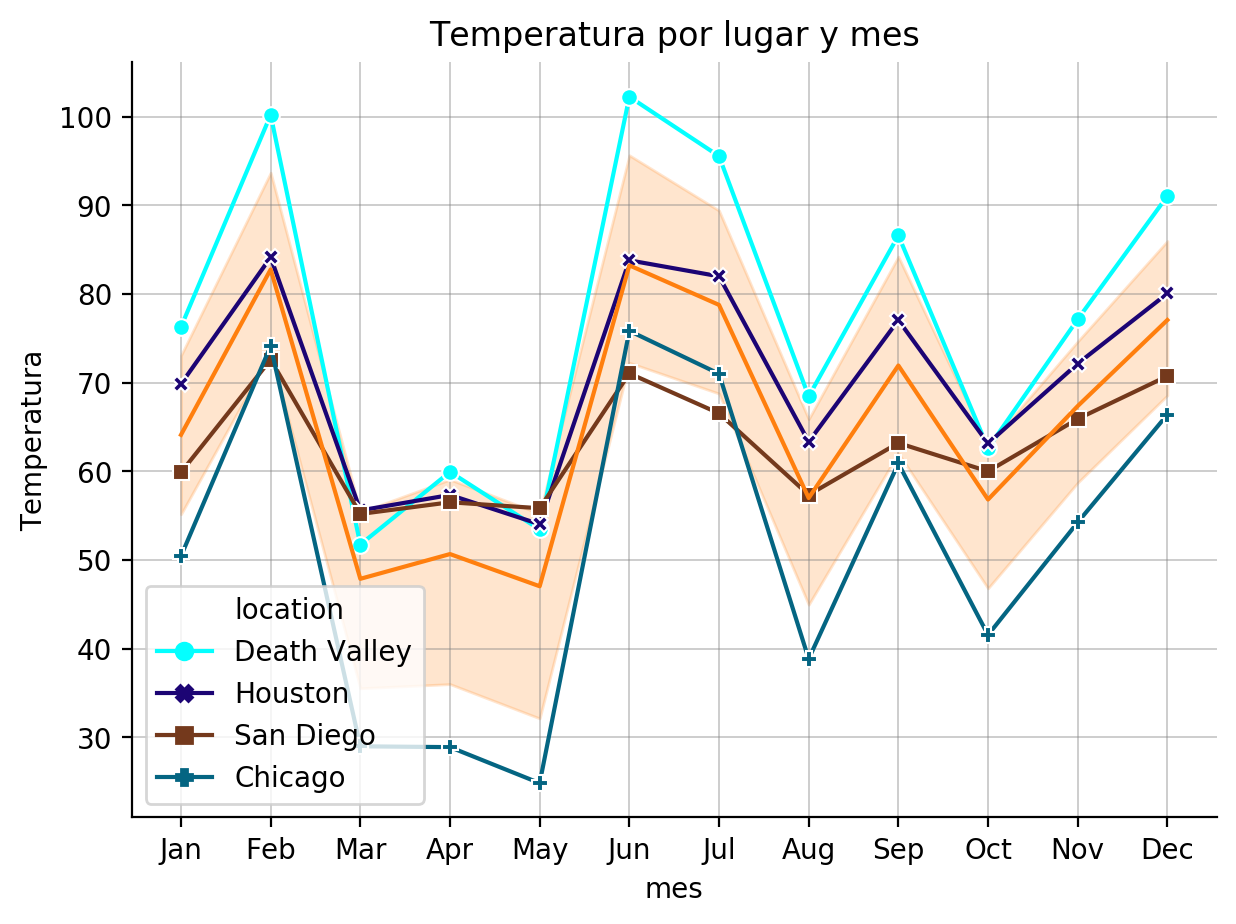

In [42]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(7, 5), dpi = 200)


def theme_minimal(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(color='grey', linestyle='-', linewidth=0.55, alpha=0.5)
  ax.set_title('Temperatura por lugar y mes')
  ax.set_xlabel('mes')
  ax.set_ylabel('Temperatura')
 

paleta = {
  "Chicago": "#046582",
  "San Diego": "#74391c",
  "Houston": "#1c0474",
  "Death Valley": "#04ffff"}

#for genero in cantones:
#  df = delitos_mes_canton[delitos_mes_canton.index.get_level_values(1) == location]
#  x = df.index.get_level_values(0)
###  y = df
#day_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#plt.xticks(x="month", day_order)
  
str_month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(range(0,12))
ax.set_xticklabels(str_month_list)

sb.lineplot(x = "month", y = "mean",data = datos,ax=ax,hue="location",
             style="location", markers=True, dashes=False,palette=paleta)
sb.lineplot(x = "month", y = "mean",data = datos,ax=ax)
theme_minimal(ax)